# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

# **Preparing The Data**

Loading the primary datasets

In [2]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [3]:
df.duplicated().sum() # Finding number of duplicate rows

0

Examining the Structure

In [4]:
df.shape # Extracting the shape of dataframe

(8807, 12)

In [5]:
df.head() # Overviewing the data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.isnull().sum() # Seeing the missing values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6959,s6960,Movie,Her Only Choice,Christel Gibson,"Denise Boutte, Timon Kyle Durrett, Leon, Tamar...",United States,"May 2, 2019",2018,TV-14,87 min,Dramas,A woman must decide if she’s willing to end he...
4018,s4019,Movie,Barcelona: A Love Untold,Olivia M. Lamasan,"Kathryn Bernardo, Daniel Padilla, Joshua Garci...",Philippines,"March 14, 2019",2016,TV-14,132 min,"Dramas, International Movies, Romantic Movies","While pursuing a degree in Spain, an architect..."
3543,s3544,TV Show,Serial Killer with Piers Morgan,NaN,Piers Morgan,United Kingdom,"September 1, 2019",2018,TV-14,1 Season,"British TV Shows, Crime TV Shows, Docuseries","Through intense prison interviews, Piers Morga..."
2013,s2014,TV Show,The Duchess,NaN,"Katherine Ryan, Rory Keenan, Katy Byrne, Doon ...",United Kingdom,"September 11, 2020",2020,TV-MA,1 Season,"British TV Shows, International TV Shows, TV C...","Katherine's a single mom juggling her career, ..."
4377,s4378,Movie,Trevor Noah: Son of Patricia,David Paul Meyer,Trevor Noah,United States,"November 20, 2018",2018,TV-MA,64 min,Stand-Up Comedy,"""Daily Show"" host Trevor Noah touches on tacos..."
6772,s6773,Movie,Follow Me,Asri Bendacha,Asri Bendacha,"United Arab Emirates, United States, United Ki...","November 16, 2018",2017,TV-MA,86 min,"Documentaries, International Movies",Aspiring to be an internet celebrity and make ...
5308,s5309,Movie,Rocco,"Thierry Demaizière, Alban Teurlai",Rocco Siffredi,France,"September 1, 2017",2016,TV-MA,103 min,"Documentaries, International Movies",Italian porn star Rocco Siffredi is showcased ...
1604,s1605,Movie,Ari Eldjárn: Pardon My Icelandic,August Jakobsson,Ari Eldjárn,Iceland,"December 2, 2020",2020,TV-MA,54 min,Stand-Up Comedy,"In this English-language special, Icelandic co..."
7064,s7065,Movie,Incomplete,Suman Mukhopadhyay,"Ritwick Chakraborty, Swastika Mukherjee, Paoli...",India,"April 8, 2017",2017,TV-MA,119 min,"Dramas, International Movies, Romantic Movies","A man returns to his childhood hometown, where..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...


In [9]:
df= df.drop(columns = ['show_id', 'title'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   director      6173 non-null   object
 2   cast          7982 non-null   object
 3   country       7976 non-null   object
 4   date_added    8797 non-null   object
 5   release_year  8807 non-null   int64 
 6   rating        8803 non-null   object
 7   duration      8804 non-null   object
 8   listed_in     8807 non-null   object
 9   description   8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [10]:
pd.crosstab(df['type'], df['release_year'])[2021]

type
Movie      277
TV Show    315
Name: 2021, dtype: int64

# **Extracting the Profile Report**

In [11]:
prof = ProfileReport(df) # getting the profile report to view the insights
prof.to_file(output_file = 'output.html') # converting it to an html file to view the content

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:01<00:00,  5.89it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Task 1**

**1.) Overall composition: Movies vs. TV Shows distribution**

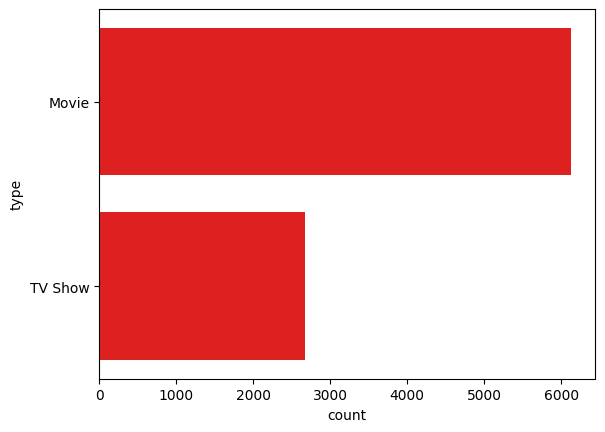

In [12]:
type_count = sns.countplot(y = df['type'], color = 'red')
plt.show()

In [13]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

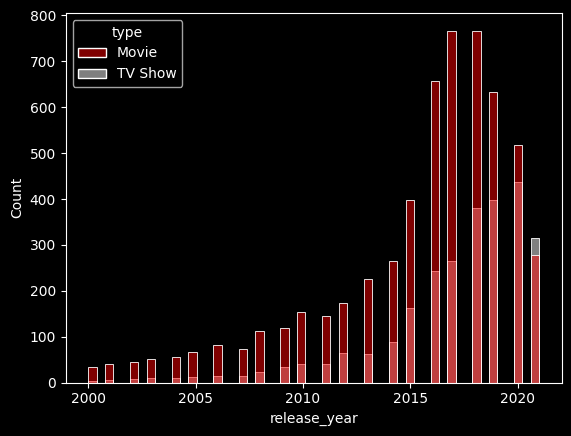

In [14]:
plt.style.use('dark_background')
year_type = sns.histplot(x = 'release_year', palette = ['red', 'white'], hue = 'type', data = df[df['release_year'] >= 2000])
plt.show()

In [15]:
TV_Show_percent = pd.crosstab(df['release_year'], df['type'])
TV_Show_percent['percent'] = TV_Show_percent['TV Show']/(TV_Show_percent['TV Show'] + TV_Show_percent['Movie'])*100
TV_Show_percent

type,Movie,TV Show,percent
release_year,,,
1925,0,1,100.000000
1942,2,0,0.000000
1943,3,0,0.000000
1944,3,0,0.000000
1945,3,1,25.000000
...,...,...,...
2017,767,265,25.678295
2018,767,380,33.129904
2019,633,397,38.543689


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='release_year', ylabel='percent'>

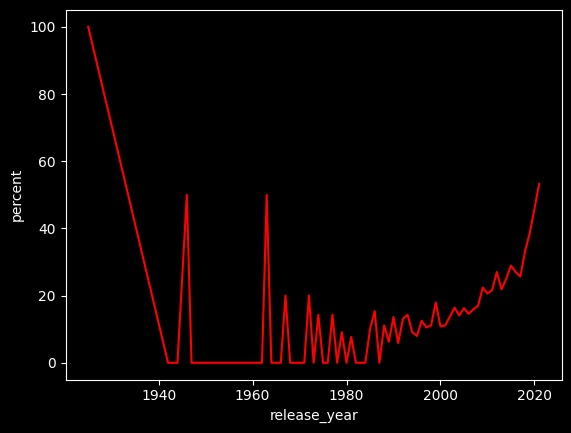

In [16]:
sns.lineplot(x = 'release_year', y = 'percent', data = TV_Show_percent, color = 'red')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='release_year', ylabel='percent'>

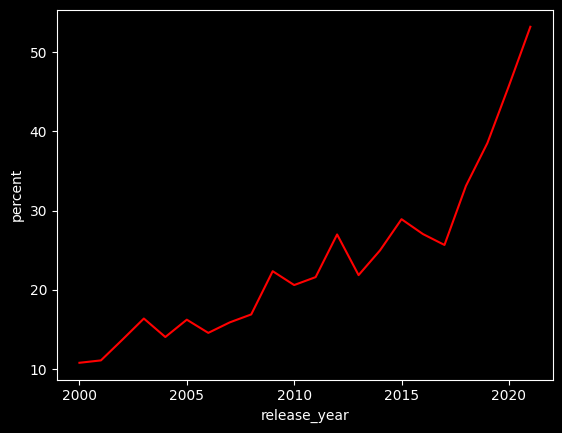

In [17]:
# Truncating the release year data
sns.lineplot(x = 'release_year', y = 'percent', data = TV_Show_percent[TV_Show_percent.index >= 2000], color = 'red')

**Seasonal Analysis of TV shows**

In [18]:
df_seasons = df[df['type'] == 'TV Show']['duration'].str[0].astype(int) # Taking out the number of seasons of the TV Show
df_release_year = df[df['type'] == 'TV Show']['release_year'].value_counts() # Taking out the value count of the TV show with respect to release year 

In [19]:
for i in df_seasons.index: # Appending one to subsequent years according to the number of seasons
    yr = df['release_year'].loc[i]
    sn = df_seasons.loc[i]
    for j in range(1, sn):
        if yr+1 in df_seasons.index:
            df_release_year.loc[yr] += 1
            yr += 1

In [20]:
df_rel_yr = pd.DataFrame(df_release_year) # Making it a dataframe to make further operation smooth
df_rel_yr.columns.values[0] = 'TV Show' # Changing the name of the column

In [21]:
df_movie = df[df['type'] == 'Movie']['release_year'].value_counts() # Taking out the value count of the TV show with respect to release year
df_movie = pd.DataFrame(df_movie) # Making it a dataframe to make further operation smooth
df_movie.columns.values[0] = 'Movie' # Changing the name of the column

In [22]:
df_sn_type = pd.concat([df_movie, df_rel_yr], axis = 1) # Concatanating the two dataframes with aligning the index
df_sn_type['Movie'] = df_sn_type['Movie'].fillna(0).astype(int) # Filling the missing values with zero and changing the datatype to integer

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0, 0.5, 'count')

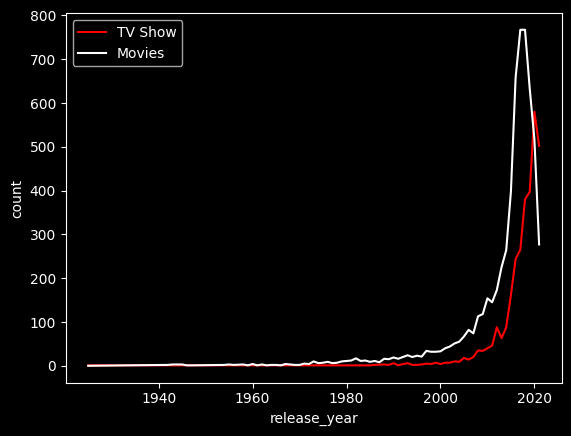

In [23]:
sns.lineplot(x = 'release_year', y = 'TV Show', data = df_sn_type, color = 'red', label='TV Show')
sns.lineplot(x = 'release_year', y = 'Movie', data = df_sn_type, color = 'white', label='Movies')
plt.ylabel('count')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0, 0.5, 'count')

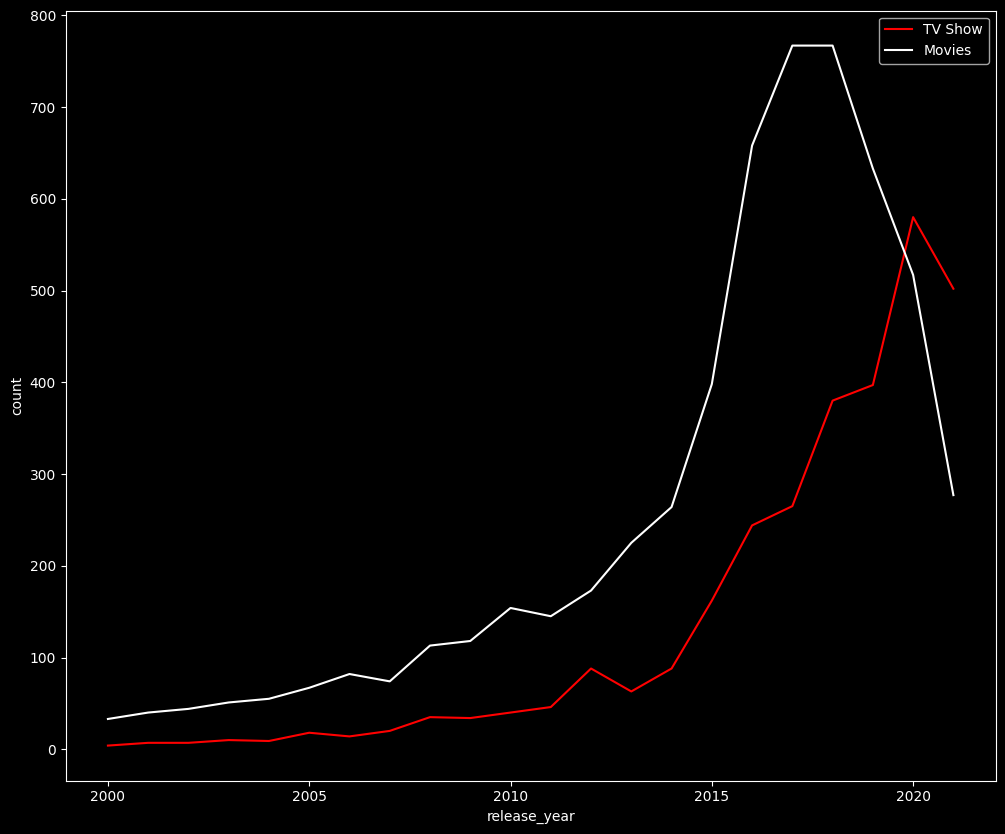

In [24]:
plt.figure(figsize = (12, 10))
sns.lineplot(x = 'release_year', y = 'TV Show', data = df_sn_type[df_sn_type.index >= 2000], color = 'red', label='TV Show')
sns.lineplot(x = 'release_year', y = 'Movie', data = df_sn_type[df_sn_type.index >= 2000], color = 'white', label='Movies')

plt.ylabel('count')

Text(0, 0.5, 'count')

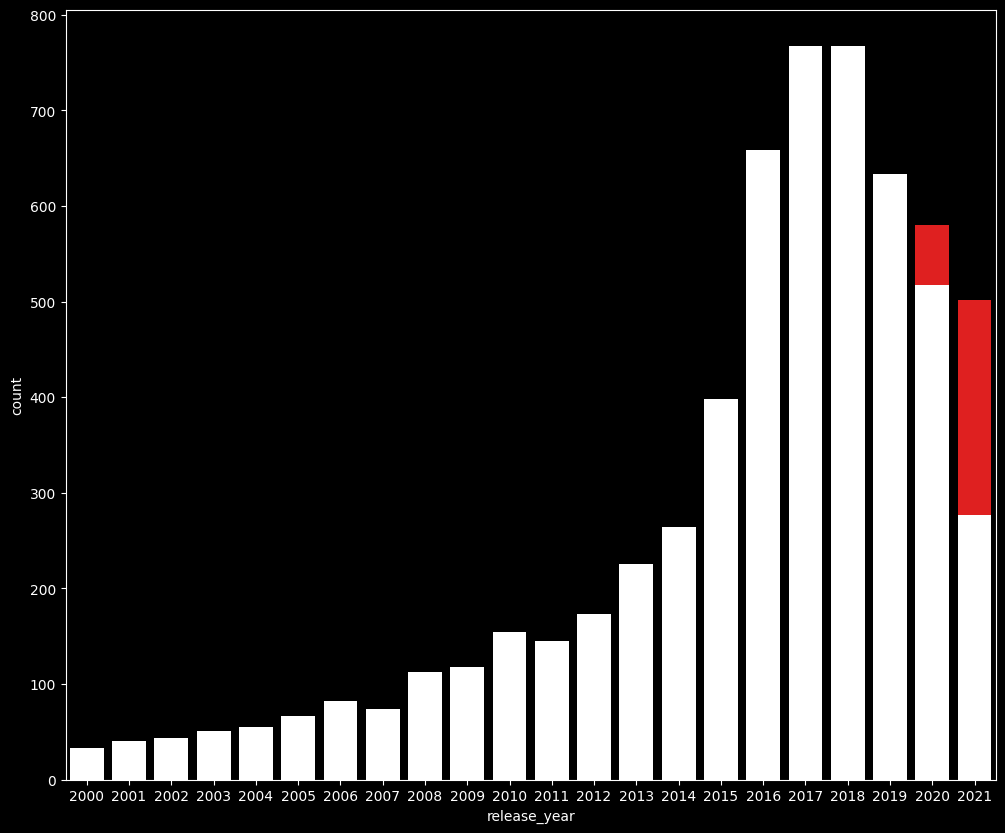

In [25]:
plt.figure(figsize = (12, 10))
sns.barplot(x = 'release_year', y = 'TV Show', data = df_sn_type[df_sn_type.index >= 2000].reset_index(), color = 'red', label='TV Show')
sns.barplot(x = 'release_year', y = 'Movie', data = df_sn_type[df_sn_type.index >= 2000].reset_index(), color = 'white', label='Movies')

plt.ylabel('count')

**Separating each country from the country column**

In [26]:
def country_list(x): # The function for converting the string input in country column to list
    if pd.isna(x):
        return x
    else:
        return [i.strip().strip("'").strip('"') for i in x.split(',')]

In [27]:
df_temp = df.copy()

In [28]:
df_temp['country'] = df_temp['country'].apply(country_list) # Applying the function on country column 

In [29]:
df_country_expl = df_temp.explode('country') # Separating the countries

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

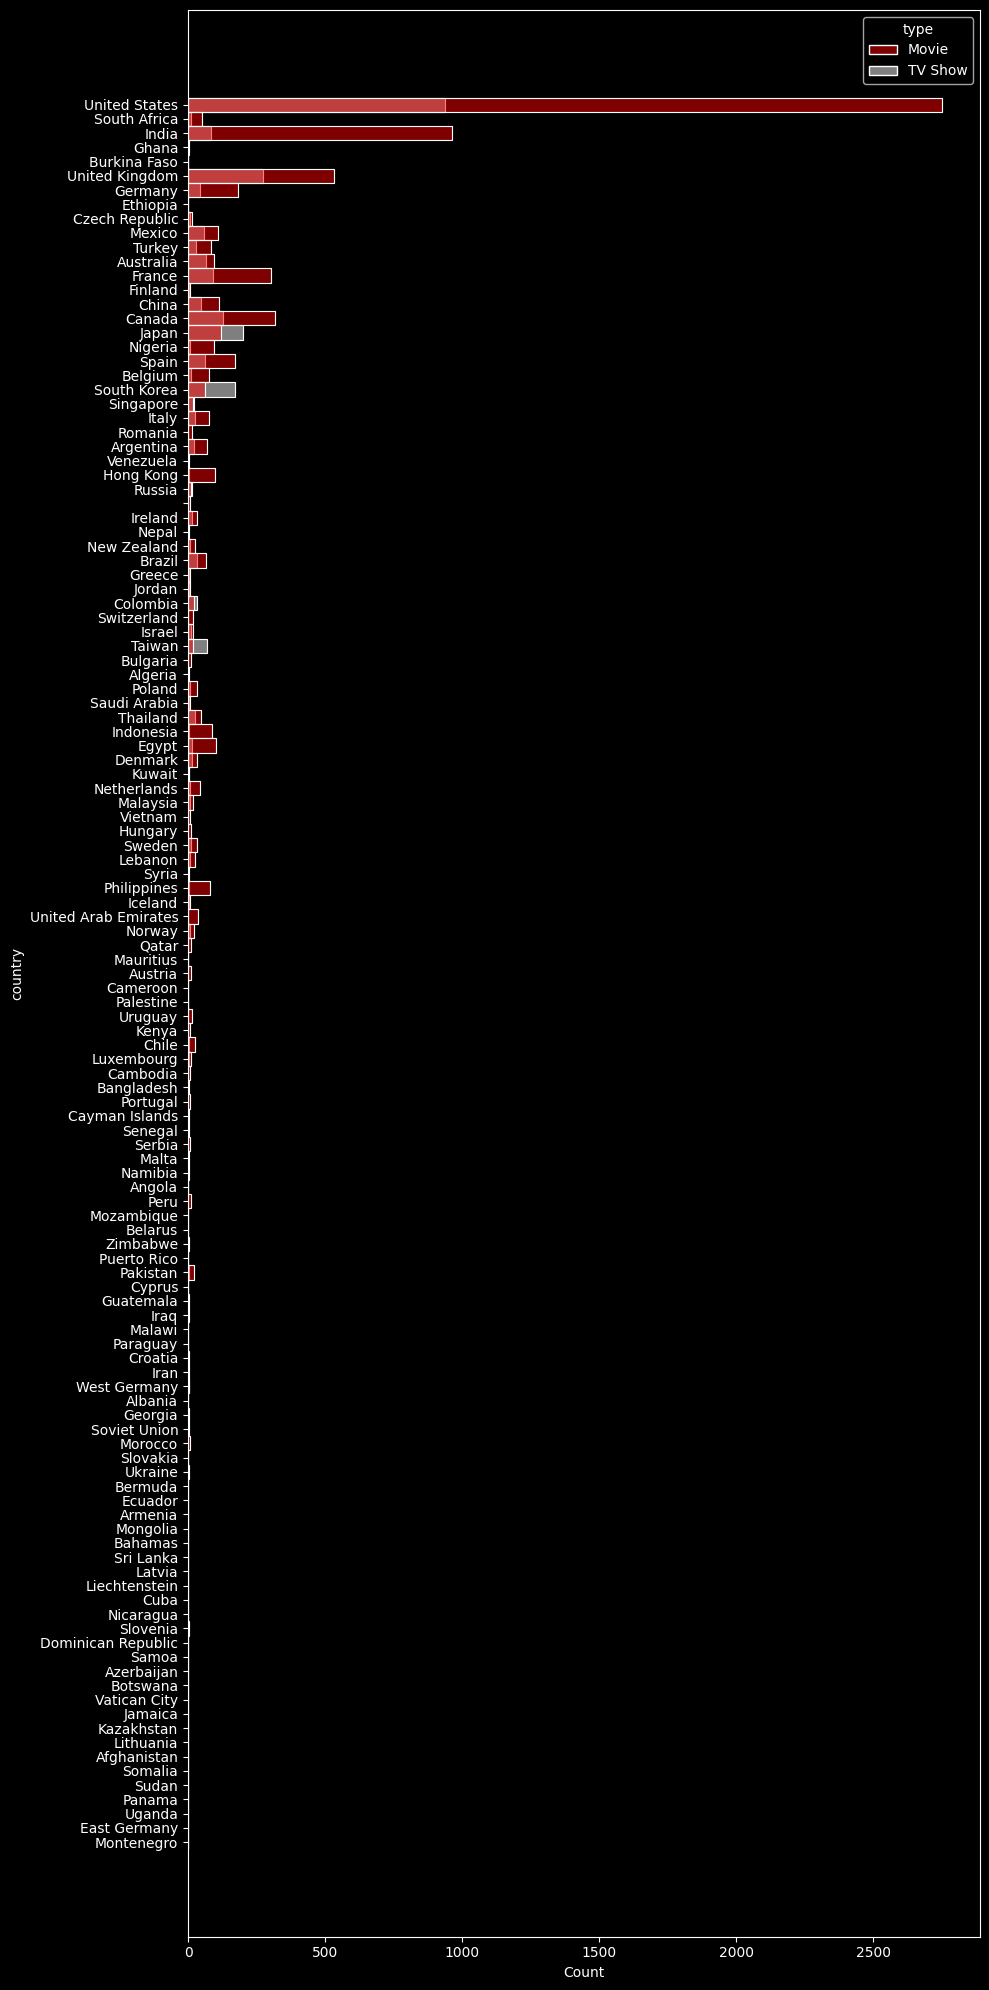

In [30]:
plt.figure(figsize=(10, 20))
country_count = sns.histplot(y = 'country', hue = 'type', data = df_country_expl.dropna(subset = ['country']), palette = ['red', 'white']) # Making a bar plot for country wise value count
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

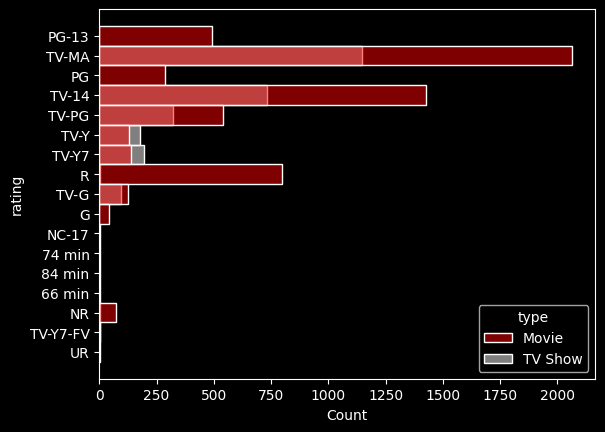

In [31]:
rating_count = sns.histplot(y = 'rating', hue = 'type',palette = ['red', 'white'], data = df.dropna(subset = ['rating'])) # Making a bar plot for rating wise value count
plt.show()

**2.) Genre distribution and popularity patterns**

**Separating each genre from the listed_in column**

In [32]:
def listed_in_list(x): # The function for converting the string input in listed_in column to list
    return [i.strip().strip("'").strip('"') for i in x.split(',')]

In [33]:
df['listed_in'] = df['listed_in'].apply(listed_in_list) # Applying the function on listed_in column 

In [34]:
df_listed_in_expl = df.explode('listed_in') # Separating the genre

In [35]:
heat_data = pd.crosstab( # Making the data to plot heatmap
    df_listed_in_expl.dropna(subset=['rating']).reset_index(drop=True)['listed_in'], # Resetting the index as exploding duplicates the index
    df_listed_in_expl.dropna(subset=['rating']).reset_index(drop=True)['rating']
)

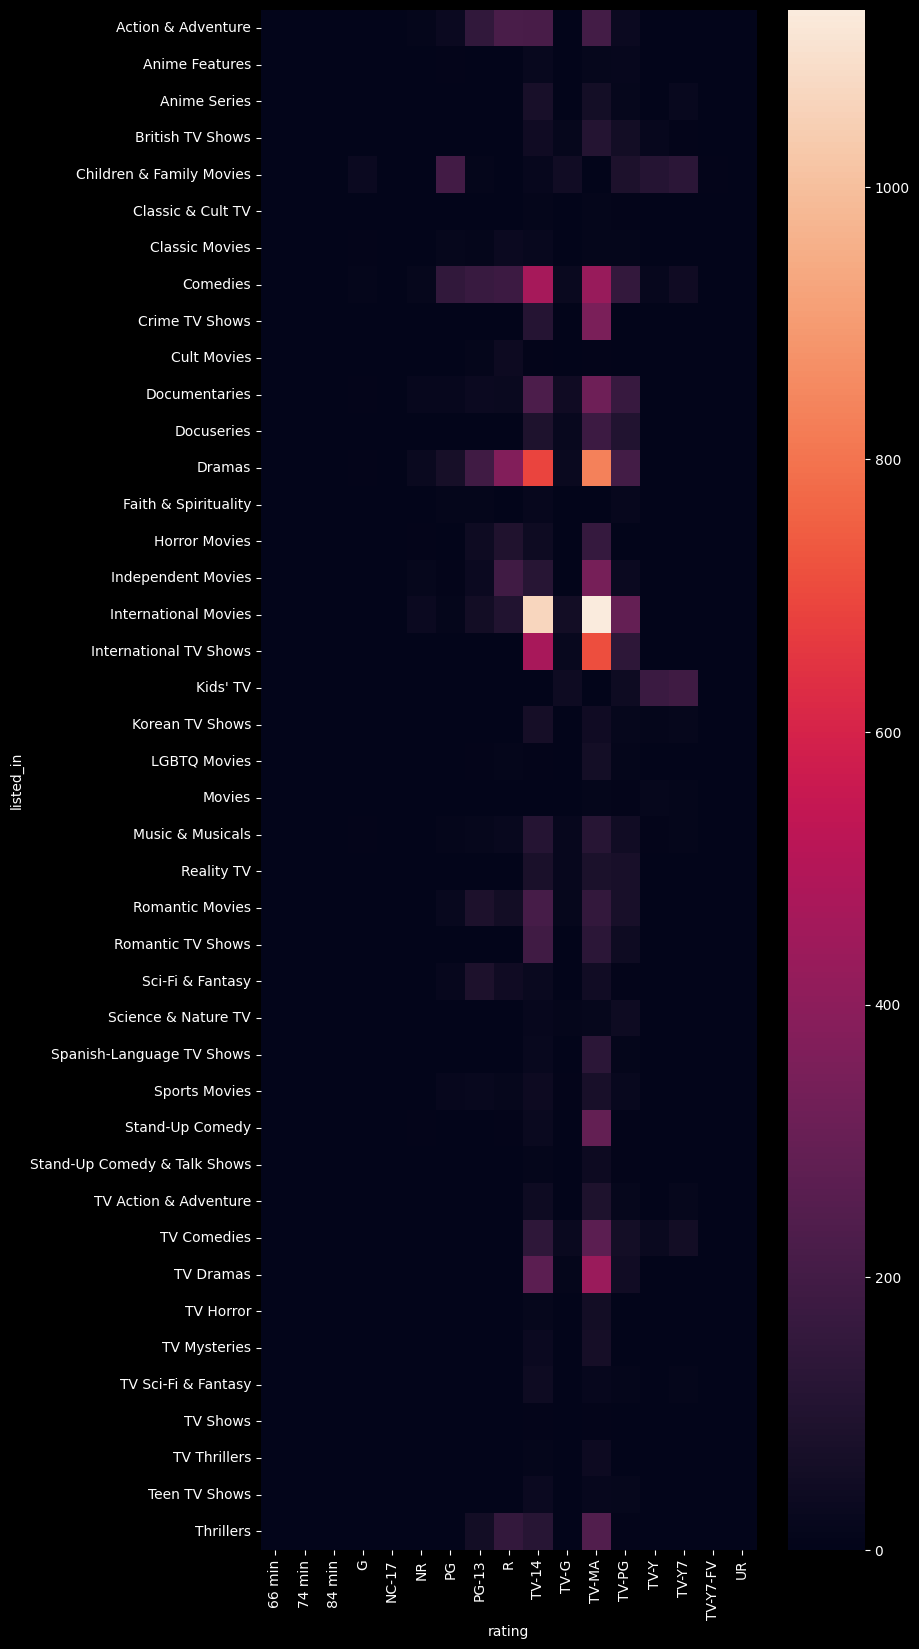

In [36]:
plt.figure(figsize = (8, 20))
genre_rating = sns.heatmap(heat_data)
plt.show()

**3.) Rating categories and their prevalence**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

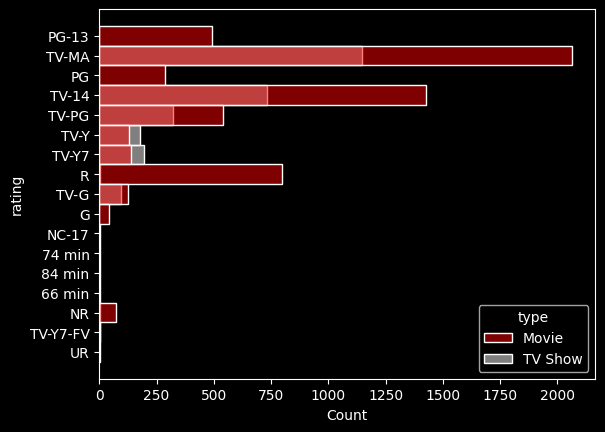

In [37]:
plt.style.use('dark_background')
rating_count = sns.histplot(y = 'rating', data = df, hue = 'type', palette = ['red', 'white'])
plt.show()

**4.) Content volume trends over time**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   director      6173 non-null   object
 2   cast          7982 non-null   object
 3   country       7976 non-null   object
 4   date_added    8797 non-null   object
 5   release_year  8807 non-null   int64 
 6   rating        8803 non-null   object
 7   duration      8804 non-null   object
 8   listed_in     8807 non-null   object
 9   description   8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


**Year-wise movie and tv shows count**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

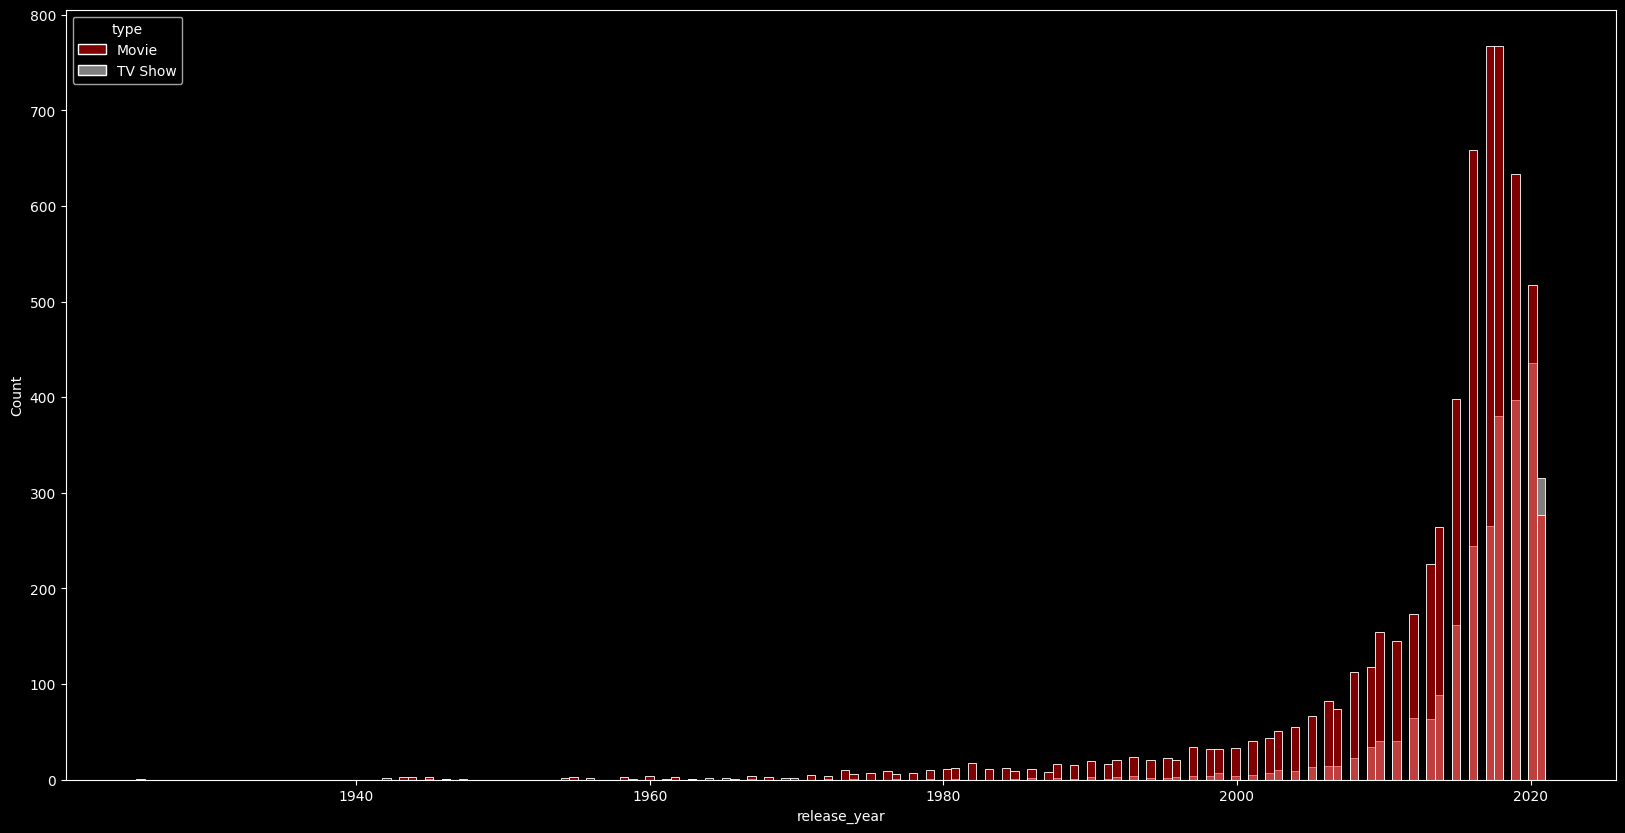

In [39]:
plt.figure(figsize = (20, 10))
year_count = sns.histplot(x = 'release_year', hue = 'type', data = df, palette = ['red', 'white'])
plt.show()

**Count of year-wise movie and tv shows according to rating**

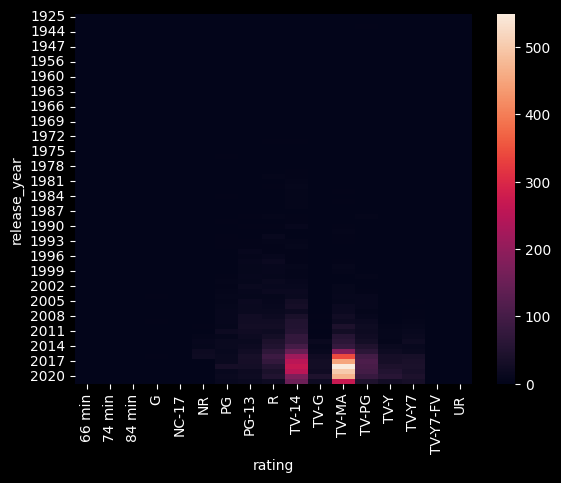

In [40]:
year_rating = sns.heatmap(pd.crosstab(df['release_year'], df['rating']))
plt.show()

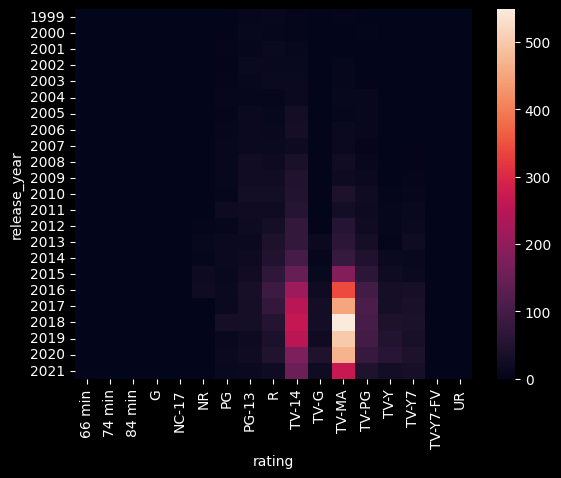

In [41]:
# As most of the content produced is after 1999 so truncating the data:
year_rating_rel = sns.heatmap(pd.crosstab(df[df['release_year'] >= 1999]['release_year'], df[df['release_year'] >= 1999]['rating']))
plt.show()

**Count of movies and tv shows according to genre**

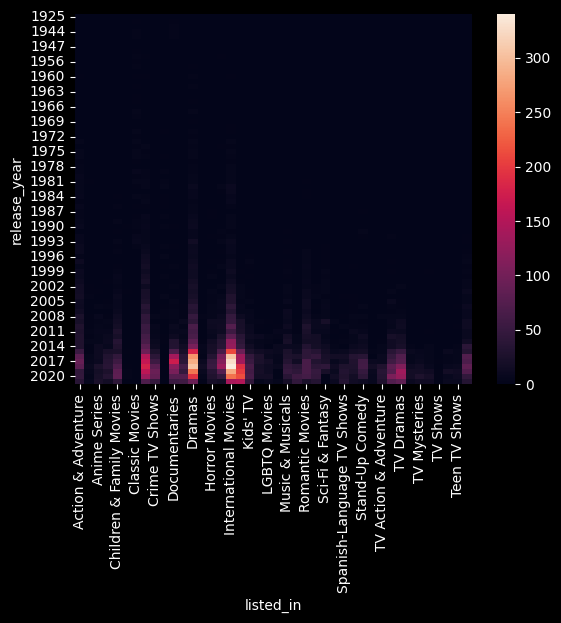

In [42]:
year_genre = sns.heatmap(pd.crosstab(df_listed_in_expl['release_year'], df_listed_in_expl['listed_in']))
plt.show()

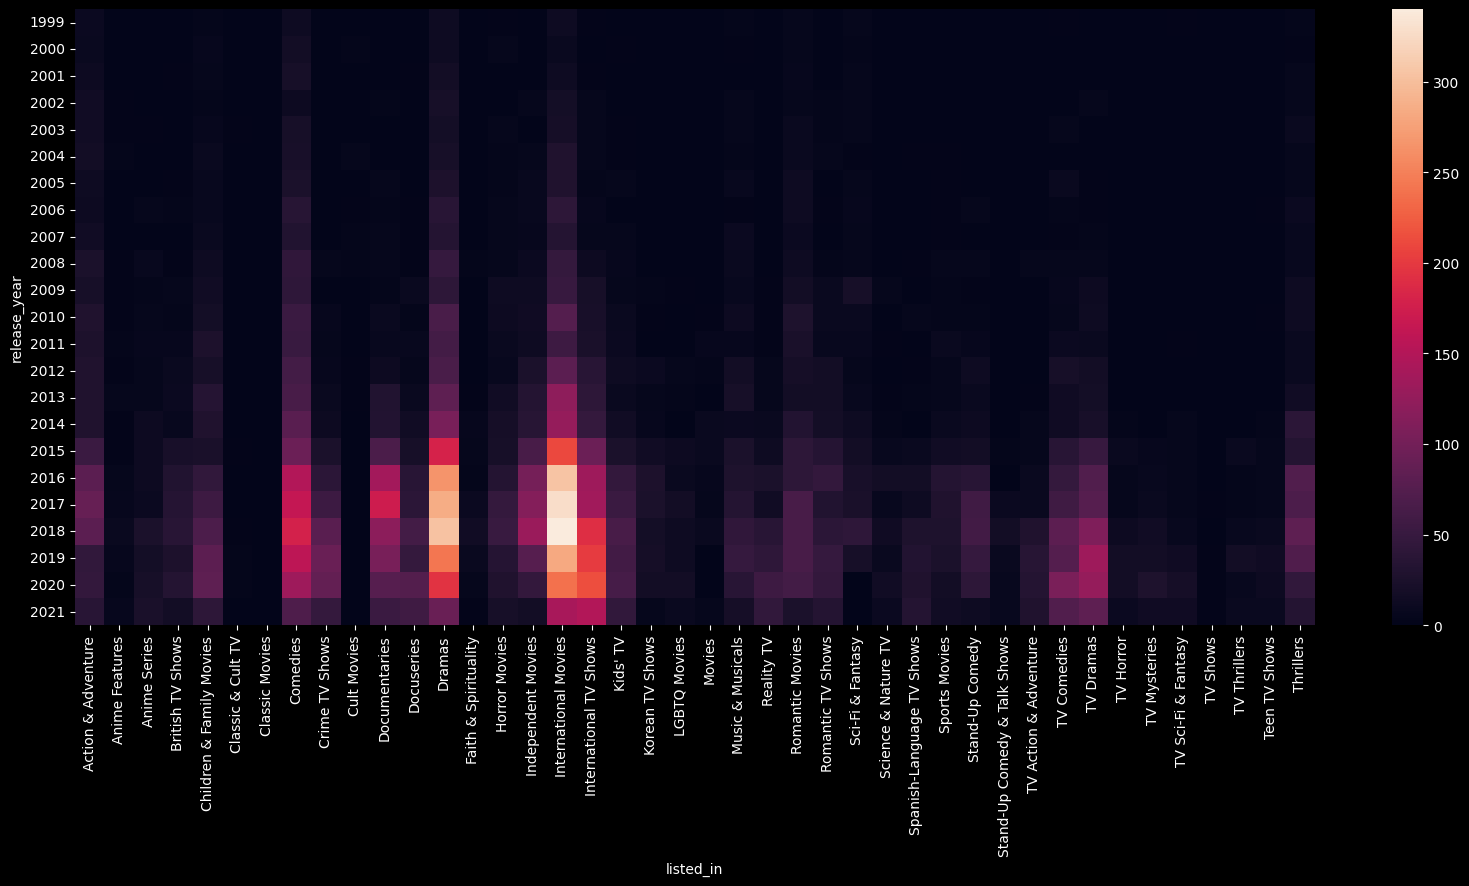

In [43]:
# Again truncating the data
df_temp = df_listed_in_expl.reset_index(drop = True) # Resetting the index to remove duplicate index error
df_temp = df_temp[df_temp['release_year'] >= 1999] # Truncating
plt.figure(figsize = (20, 8)) # Increasing the size to accomodate the wide range of genres smoothly
year_genre_rel = sns.heatmap(pd.crosstab(df_temp['release_year'], df_temp['listed_in']))
plt.show()

**Countrywise content produced over time**

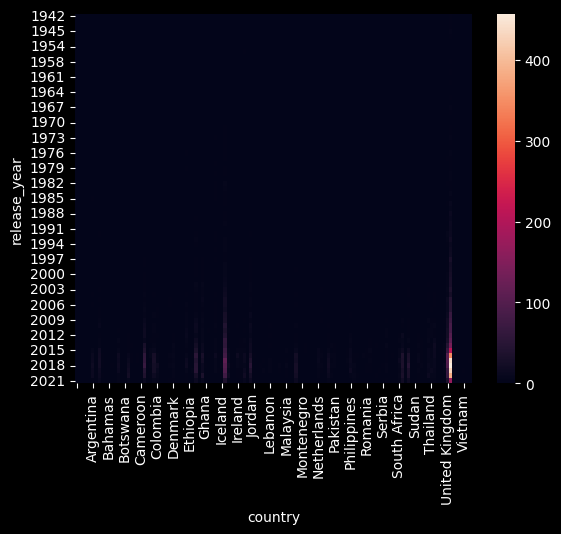

In [44]:
df_temp = df_country_expl.dropna(subset = ['country']) # Dropping missing values
year_country = sns.heatmap(pd.crosstab(df_temp['release_year'], df_temp['country']))
plt.show()

In [45]:
df_temp['country'].value_counts().head(20) # Checking the data to set the threshold

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Belgium             90
Name: count, dtype: int64

<Figure size 5000x1000 with 0 Axes>

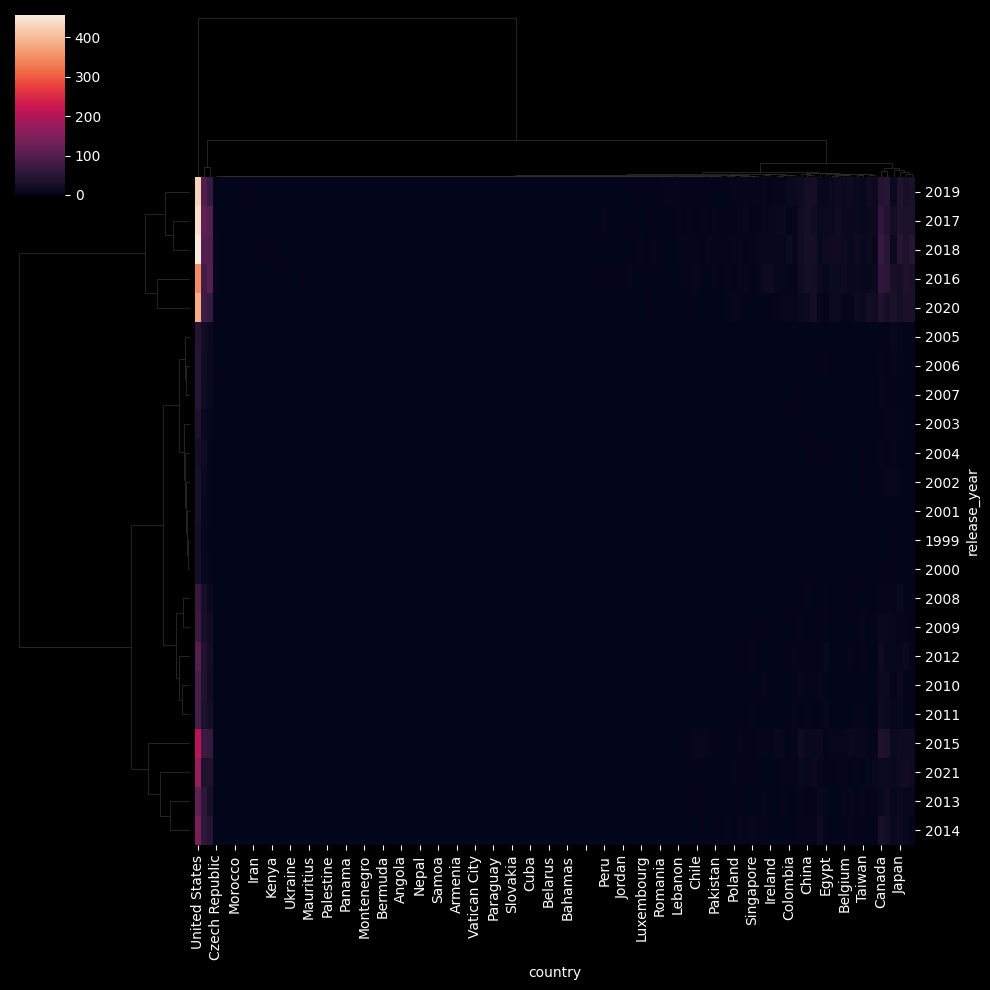

In [46]:
# Truncating the data
df_temp = df_country_expl.dropna(subset = ['country']).reset_index(drop = True) # Resetting the index to remove duplicate index error
df_temp = df_temp[df_temp['release_year'] >= 1999] # Truncating

plt.figure(figsize = (50, 10)) # Increasing the size to accomodate the wide range of genres smoothly
year_country_rel = sns.clustermap(pd.crosstab(df_temp['release_year'], df_temp['country']))
plt.show()

In [47]:
# Still the data is too large but we can contain the countries with too less content in others category
counts = df_temp['country'].value_counts()
df_temp['country'].nunique()

threshold = 100
repl = counts[counts <= threshold].index
df_temp['country'] = df_temp['country'].replace(repl, 'others')

In [48]:
df_temp.sample(5)

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1072,Movie,Blair Simmons,"Simon Greenall, Rob Rackstraw, Jo Wyatt, Paul ...",China,"March 30, 2021",2021,TV-Y,73 min,Children & Family Movies,When red-hot volcanoes start a chain reaction ...
5177,TV Show,NaN,"Kelsey Grammer, Anton Yelchin, Charlie Saxton,...",Mexico,"May 25, 2018",2018,TV-Y7,3 Seasons,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...","After uncovering a mysterious amulet, an avera..."
2784,TV Show,NaN,"Atsuko Tanaka, Osamu Saka, Akio Otsuka, Koichi...",Japan,"April 23, 2020",2020,TV-14,1 Season,"Anime Series, Crime TV Shows, International TV...","After a global financial crisis, the world is ..."
3411,Movie,Jagdeep Sidhu,"Ammy Virk, Sargun Mehta, Guggu Gill, Tania, Ha...",India,"December 1, 2019",2018,TV-PG,137 min,"Dramas, International Movies, Romantic Movies",A young villager moves to Chandigarh and falls...
387,TV Show,NaN,"Park Min-young, Kim Jae-uk, Ahn Bo-hyun, Jung ...",South Korea,"July 15, 2021",2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","An art curator's life unravels, as she tries t..."


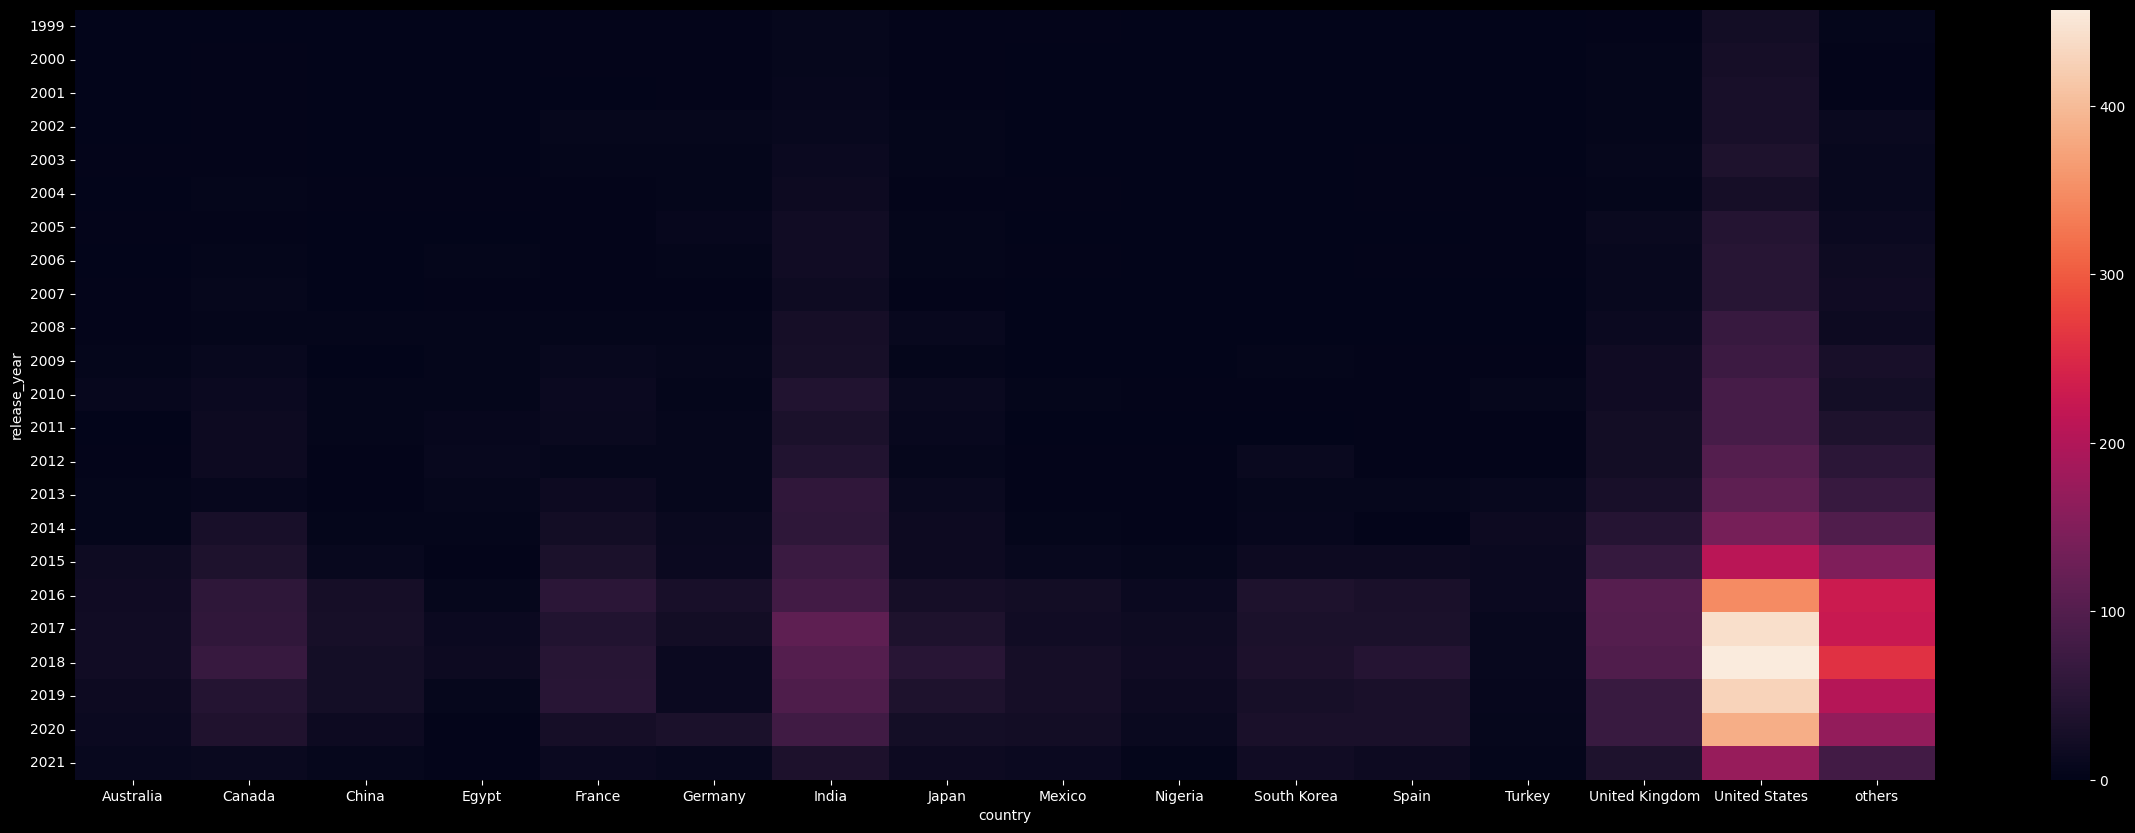

In [49]:
plt.figure(figsize = (30, 10)) # Increasing the size to accomodate the wide range of genres smoothly
year_country_rel = sns.heatmap(pd.crosstab(df_temp['release_year'], df_temp['country']))
plt.show()

In [50]:
df_temp['country'].value_counts()
df_country_expl['country'].isnull().sum()

831

**5.) Geographic distribution of content production**


**Countrywise count of content produced according to ratings**

In [51]:
df_temp = df_country_expl.dropna(subset = ['country', 'rating']).reset_index(drop = True) # Resetting the index to remove duplicate index error
counts = df_temp['country'].value_counts()
df_temp['country'].nunique()

threshold = 100
repl = counts[counts <= threshold].index
df_temp['country'] = df_temp['country'].replace(repl, 'others')

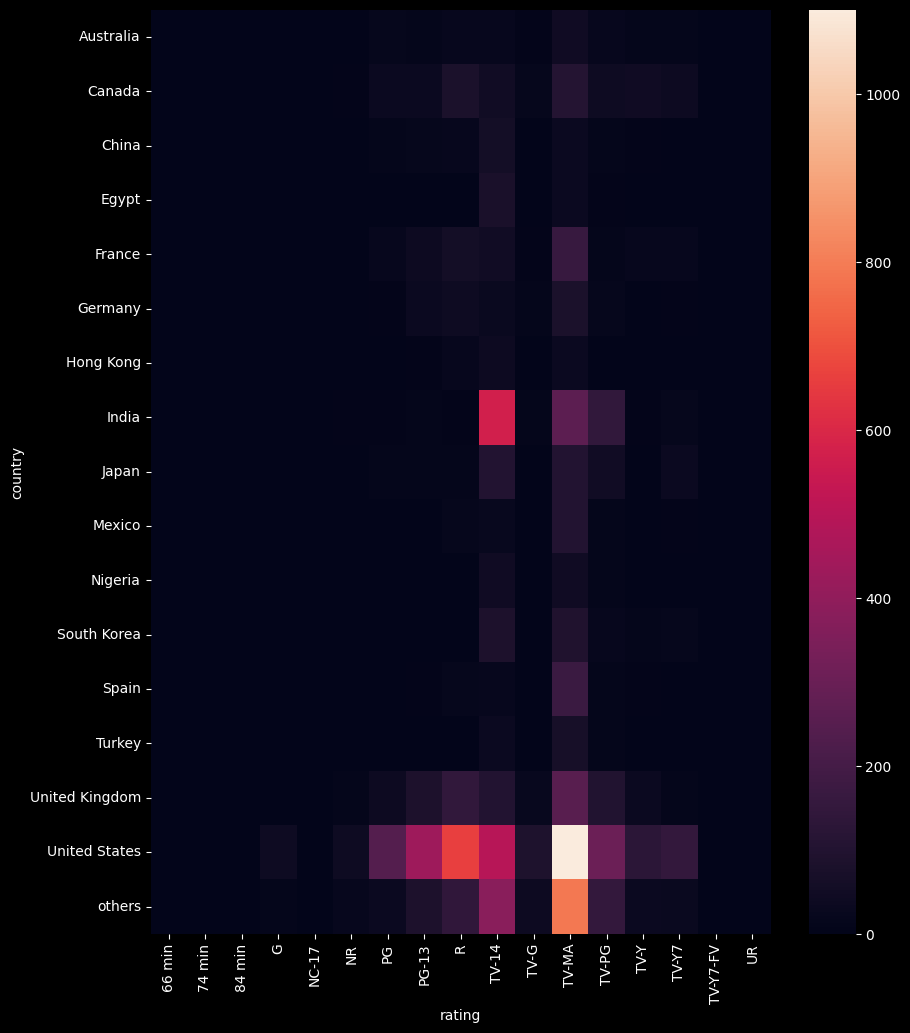

In [52]:
plt.figure(figsize = (10, 12))
country_rating = sns.heatmap(pd.crosstab(df_temp['country'],df_temp['rating']))
plt.show()

**Countrywise count of content produced according to genre**

In [53]:
del df_temp
df_temp = df_country_expl.dropna(subset = ['country', 'listed_in']).reset_index(drop = True) # Resetting the index to remove duplicate index error
counts = df_temp['country'].value_counts()
df_temp['country'].nunique()

threshold = 100
repl = counts[counts <= threshold].index
df_temp['country'] = df_temp['country'].replace(repl, 'others')
df_temp['listed_in'] = df_temp['listed_in'].apply(listed_in_list) # converting the genre column into list
df_temp = df_temp.explode(['listed_in'])

In [54]:
df_temp['listed_in'] = df_temp['listed_in'].apply(listed_in_list) # converting the genre column into list
df_temp = df_temp.explode(['listed_in'])

<Axes: xlabel='country', ylabel='listed_in'>

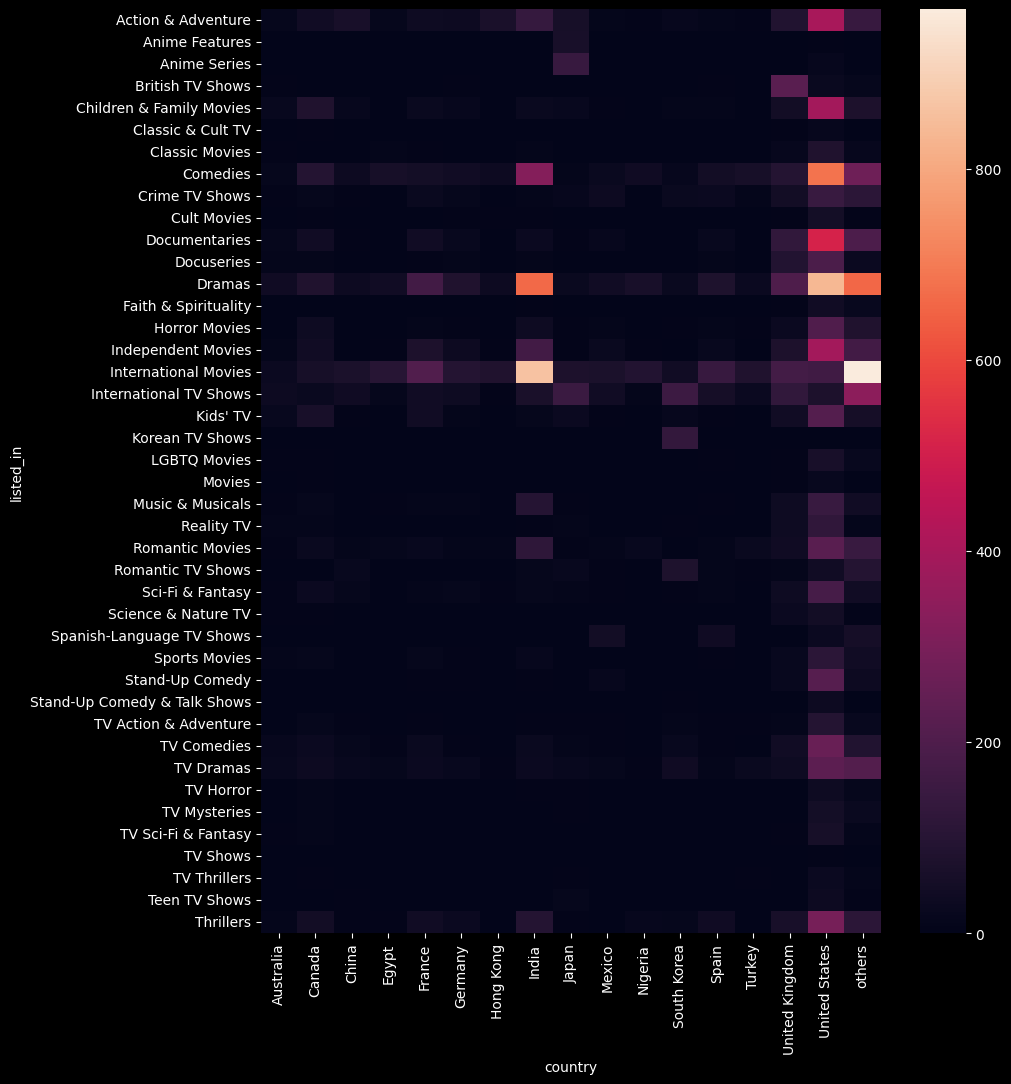

In [55]:
plt.figure(figsize = (10, 12))
sns.heatmap(pd.crosstab(df_temp['listed_in'], df_temp['country']))

# **Task 2**

**1.) Netflix catalog growth over the years**